In [2]:
import os 

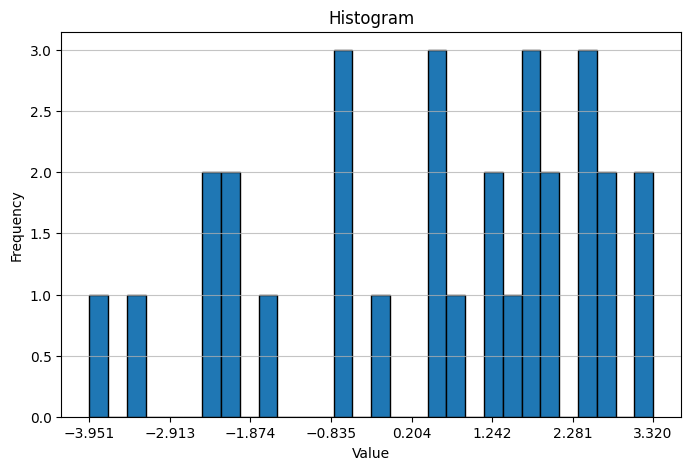

In [41]:
import matplotlib.pyplot as plt
import numpy as np
values_str = []
# 데이터 준비
files = [ x for x in os.listdir() if ".xyz" in x]
Ns = []
for file in files:
    with open(file, 'r') as f:
        data = f.readlines()
    valu = data[2:][23].strip().split()[-1]
    N = data[2:][12]
    Ns.append(N)
    values_str.append(valu)
values = list(map(float, values_str))

plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(values, bins=30, edgecolor='black')

# x축 눈금 설정 (bins 범위에 맞춰 적당한 간격으로)
plt.xticks(np.linspace(min(bins), max(bins), num=8))  # 8개 눈금 예시

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram")

plt.grid(axis='y', alpha=0.75)
plt.show()


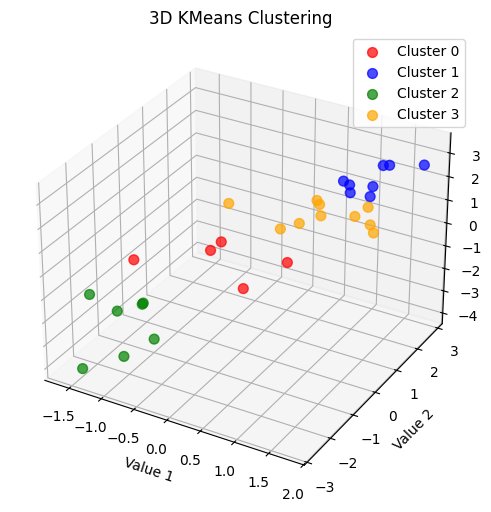

In [44]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

values_str = []
# 데이터 준비
files = [ x for x in os.listdir() if ".xyz" in x]
Ns = []
for file in files:
    with open(file, 'r') as f:
        data = f.readlines()
    valu3 = data[2:][23].strip().split()[-1]
    valu2 = data[2:][19].strip().split()[-1]
    valu1 = data[2:][18].strip().split()[-1]
    N = data[2:][12]
    Ns.append(N)
    values_str.append([valu1, valu2, valu3])
# 1. 문자열 -> float 2D 배열 변환
values_arr = np.array([[float(x) for x in v] for v in values_str])  # shape (n_samples, 3)

# 2. KMeans 군집화 (예: 4개 클러스터)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(values_arr)

# 3. 3D 산점도 그리기
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'orange']
for i in range(n_clusters):
    cluster_points = values_arr[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
               label=f'Cluster {i}', color=colors[i], s=50, alpha=0.7)

ax.set_xlabel('Value 1')
ax.set_ylabel('Value 2')
ax.set_zlabel('Value 3')
ax.set_title('3D KMeans Clustering')
ax.legend()
plt.show()
# values = list(map(float, values_str))

# # values는 float 리스트라고 가정
# values_arr = np.array(values).reshape(-1, 1)  # 1D → 2D (n_samples, 1)

# # 군집 수 4개로 KMeans 수행
# kmeans = KMeans(n_clusters=4, random_state=42)
# kmeans.fit(values_arr)

# labels = kmeans.labels_  # 각 샘플에 할당된 군집 번호 (0~3)

# # values_arr, labels는 앞서 생성된 상태라고 가정

# plt.figure(figsize=(8,5))

# colors = ['red', 'blue', 'green', 'orange']  # 군집별 색상

# bins = 30  # 히스토그램 빈 개수

# for i in range(4):
#     cluster_vals = values_arr[labels == i].flatten()
#     plt.hist(cluster_vals, bins=bins, alpha=0.5, label=f'Cluster {i}', color=colors[i], edgecolor='black')

# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram by Cluster")
# plt.legend()
# plt.grid(axis='y', alpha=0.75)
# plt.show()

# output_base = "clustered_files"
# if not os.path.exists(output_base):
#     os.makedirs(output_base)

# n_clusters = 4

# # 각 클러스터별 값 범위 구하기
# cluster_ranges = []
# for i in range(n_clusters):
#     cluster_vals = values_arr[labels == i].flatten()
#     vmin, vmax = cluster_vals.min(), cluster_vals.max()
#     cluster_ranges.append((vmin, vmax))

# # 클러스터 폴더명 예: cluster_0_1.23-4.56
# def format_range(vmin, vmax):
#     return f"{vmin:.2f}-{vmax:.2f}"

# for cluster_idx, (vmin, vmax) in enumerate(cluster_ranges):
#     folder_name = f"cluster_{cluster_idx}_{format_range(vmin, vmax)}"
#     cluster_folder = os.path.join(output_base, folder_name)
#     if not os.path.exists(cluster_folder):
#         os.makedirs(cluster_folder)

# # 파일 복사
# for file_name, cluster_label in zip(files, labels):
#     vmin, vmax = cluster_ranges[cluster_label]
#     folder_name = f"cluster_{cluster_label}_{format_range(vmin, vmax)}"
#     dst_folder = os.path.join(output_base, folder_name)
#     src_path = os.path.abspath(file_name)
#     dst_path = os.path.join(dst_folder, os.path.basename(file_name))
#     try:
#         shutil.copy2(src_path, dst_path)
#         print(f"[COPY] {file_name} -> {folder_name}")
#     except Exception as e:
#         print(f"[ERROR] {file_name}: {e}")


[COPY] IONIC_LIQUID0001_final_coord.xyz -> cluster_2
[COPY] IONIC_LIQUID0002_final_coord.xyz -> cluster_2
[COPY] IONIC_LIQUID0005_final_coord.xyz -> cluster_1
[COPY] IONIC_LIQUID0006_final_coord.xyz -> cluster_3
[COPY] IONIC_LIQUID0007_final_coord.xyz -> cluster_1
[COPY] IONIC_LIQUID0009_final_coord.xyz -> cluster_2
[COPY] IONIC_LIQUID0011_final_coord.xyz -> cluster_2
[COPY] IONIC_LIQUID0013_final_coord.xyz -> cluster_0
[COPY] IONIC_LIQUID0014_final_coord.xyz -> cluster_1
[COPY] IONIC_LIQUID0016_final_coord.xyz -> cluster_0
[COPY] IONIC_LIQUID0017_final_coord.xyz -> cluster_1
[COPY] IONIC_LIQUID0018_final_coord.xyz -> cluster_0
[COPY] IONIC_LIQUID0019_final_coord.xyz -> cluster_1
[COPY] IONIC_LIQUID0021_final_coord.xyz -> cluster_3
[COPY] IONIC_LIQUID0022_final_coord.xyz -> cluster_3
[COPY] IONIC_LIQUID0023_final_coord.xyz -> cluster_3
[COPY] IONIC_LIQUID0025_final_coord.xyz -> cluster_0
[COPY] IONIC_LIQUID0026_final_coord.xyz -> cluster_3
[COPY] IONIC_LIQUID0027_final_coord.xyz -> clu

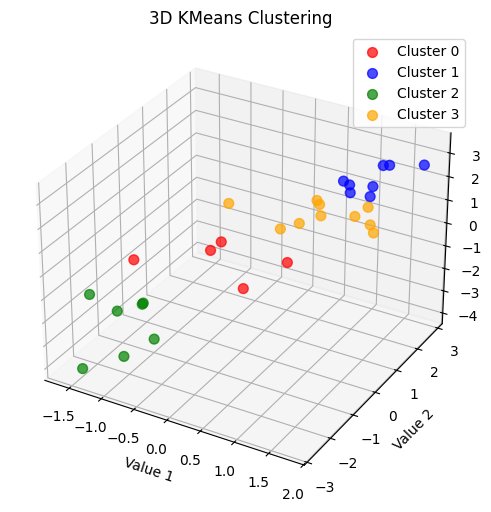

In [46]:
import os
import shutil
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 데이터 준비 (이미 작성하신 코드 부분)
files = [x for x in os.listdir() if x.endswith(".xyz")]
Ns = []
values_str = []
for file in files:
    with open(file, 'r') as f:
        data = f.readlines()
    valu3 = data[2:][23].strip().split()[-1]
    valu2 = data[2:][19].strip().split()[-1]
    valu1 = data[2:][18].strip().split()[-1]
    N = data[2:][12]
    Ns.append(N)
    values_str.append([valu1, valu2, valu3])

# 2. 문자열 리스트 → float 2D numpy 배열 변환
values_arr = np.array([[float(x) for x in v] for v in values_str])  # shape (n_samples, 3)

# 3. KMeans 군집화
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(values_arr)

# 4. 군집별 폴더 생성 및 파일 복사
output_base = "clustered_files"
if not os.path.exists(output_base):
    os.makedirs(output_base)

for cluster_idx in range(n_clusters):
    cluster_folder = os.path.join(output_base, f"cluster_{cluster_idx}")
    if not os.path.exists(cluster_folder):
        os.makedirs(cluster_folder)

for file_name, cluster_label in zip(files, labels):
    src_path = os.path.abspath(file_name)
    dst_path = os.path.join(output_base, f"cluster_{cluster_label}", os.path.basename(file_name))
    try:
        shutil.copy2(src_path, dst_path)
        print(f"[COPY] {file_name} -> cluster_{cluster_label}")
    except Exception as e:
        print(f"[ERROR] copying {file_name}: {e}")

# 5. 3D 군집 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange']

for i in range(n_clusters):
    cluster_points = values_arr[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
               label=f'Cluster {i}', color=colors[i], s=50, alpha=0.7)

ax.set_xlabel('Value 1')
ax.set_ylabel('Value 2')
ax.set_zlabel('Value 3')
ax.set_title('3D KMeans Clustering')
ax.legend()
plt.show()


In [ ]:
dirs = os.listdir("./clustered_files/")
for dir in dirs:
    strr  = ""
    dir = "./clustered_files/" + dir
    files = [ dir +  '/' + x for x in os.listdir(dir)]
    for file in files:
        with open(file , "r") as f:
            data = f.read()
            print(data)
            strr+= data.strip()
            strr+= "\n"
        with open(dir+ "/integrate.xyz" , "w")  as f:
            f.write(strr)

40

S 2.585774 0.668579 3.391722
S 4.886967 1.944369 2.653503
F 1.267072 1.046335 5.633535
F 2.835693 -0.571869 5.692206
F 3.382252 1.495318 5.940825
F 6.922283 0.447196 1.943248
F 7.501914 2.387014 2.814187
F 6.748401 0.792982 4.153994
O 1.877103 -0.547221 2.991577
O 1.999788 1.964899 2.992878
O 4.692072 2.908630 3.785014
O 4.685068 2.284420 1.211143
N 4.031421 0.583046 2.861922
C 2.573715 0.668571 5.235944
C 6.574591 1.351848 2.913204
N 1.384847 0.000000 0.000000
N 0.700872 2.100137 0.091133
C 2.263283 -1.146796 0.090599
C 2.719868 -1.789217 -1.275939
C 3.819196 -2.910224 -1.019382
C 1.798611 1.291394 -0.000000
C 0.000000 0.000000 -0.000000
C -0.465322 1.337728 0.119833
C 3.117602 -4.294701 -0.598919
C 0.688235 3.517154 0.269180
H 1.695928 -1.762060 0.800358
H 3.161144 -0.873915 0.656002
H 1.897033 -2.275157 -1.821929
H 3.187790 -0.944246 -1.795047
H 4.523245 -2.561462 -0.257818
H 4.310441 -3.075905 -1.985523
H 2.845081 1.550578 -0.066520
H -0.580281 -0.910721 0.025699
H -1.506882 1.

In [67]:

print(strr)

40

S 0.553275 0.294884 4.066218
S 3.209951 1.396920 4.057010
F 1.433562 -1.210203 6.040531
F 0.365582 0.683187 6.746926
F -0.733740 -1.116091 6.104905
F 2.999289 2.514487 6.537103
F 4.806090 2.884987 5.515193
F 3.016177 3.941793 4.984842
O 1.086012 -0.862087 3.326617
O -0.771092 0.823711 3.704702
O 3.577823 1.860917 2.716757
O 3.612957 0.100795 4.641344
N 1.551487 1.561875 4.022566
C 0.397854 -0.340368 5.839295
C 3.533530 2.742746 5.315798
N 1.397498 0.000000 -0.000000
N 0.745547 2.088160 0.304544
C 2.224977 -1.214752 -0.125525
C 3.447161 -1.087813 0.823554
C 4.224121 -2.448330 0.974978
C 1.838357 1.319448 -0.000000
C 0.000000 0.000000 -0.000000
C -0.362362 1.327412 0.116928
C 3.509702 -3.630219 1.749602
C 0.712917 3.434697 0.993583
H 2.615961 -1.245878 -1.155264
H 1.754207 -2.172468 0.100208
H 4.181330 -0.350888 0.450947
H 3.220613 -0.670385 1.807134
H 5.210384 -2.225057 1.391553
H 4.360222 -2.741559 -0.075638
H 2.835711 1.711739 0.137452
H -0.632988 -0.868652 0.072590
H -1.271988 1.

In [53]:
data

'40\n\nS 3.826880 1.428651 3.286783\nS 1.171463 1.580480 4.065250\nF 4.286168 3.444193 5.139766\nF 6.084109 2.223488 4.715752\nF 4.394966 1.444849 5.894276\nF 1.816478 1.210954 6.551916\nF 0.438541 -0.377140 5.681773\nF -0.278054 1.773368 6.322946\nO 4.713730 0.453427 2.703230\nO 3.521448 2.516315 2.354583\nO 1.378364 3.008918 3.998490\nO 0.223798 0.983734 3.115763\nN 2.498993 0.715487 3.811773\nC 4.709666 2.179903 4.862064\nC 0.708111 0.987950 5.756999\nN 1.402605 -0.000000 -0.000000\nN 0.766289 2.098777 0.223466\nC 2.167824 -1.290969 -0.111525\nC 2.128469 -2.182644 1.243417\nC 2.647574 -3.654484 1.289417\nC 1.862392 1.308891 -0.000000\nC 0.000000 0.000000 0.000000\nC -0.363966 1.318327 0.228346\nC 4.153986 -3.639532 1.309431\nC 0.747680 3.508257 0.571057\nH 1.665901 -1.921596 -0.864374\nH 3.179870 -0.942679 -0.379587\nH 1.116565 -2.026817 1.613782\nH 2.752450 -1.657313 1.971479\nH 2.320825 -4.126918 2.227895\nH 2.272771 -4.319987 0.507862\nH 2.906735 1.579444 -0.117683\nH -0.633607 -

In [28]:
import plotly.graph_objects as go
import numpy as np

# Ns: 문자열 리스트, 예) "C 0.123 0.456 0.789"
def parse_coord_str(coord_str):
    # 공백 기준 분리 후, 원자명은 제외하고 좌표만 float 리스트로 변환
    return list(map(float, coord_str.strip().split()[1:]))

coords_per_file = [parse_coord_str(coord) for coord in Ns]
coords_arr = np.array(coords_per_file)

fig = go.Figure(data=go.Scatter3d(
    x=coords_arr[:, 0],
    y=coords_arr[:, 1],
    z=coords_arr[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'
    ),
    title='3D Scatter plot of Ns coordinates'
)

fig.show()



In [33]:
import os
import shutil
import numpy as np
from sklearn.cluster import KMeans

# 1. Ns: 좌표 문자열 리스트 ("C 0.123 0.456 0.789")
# 2. values: 각 파일별 스칼라 값 (float)
# 3. files: 원본 파일명 리스트 (같은 순서로 Ns, values와 매칭)

# 좌표 파싱 함수
def parse_coord_str(coord_str):
    return list(map(float, coord_str.strip().split()[1:]))
# 기존 feature: (x, y, z, value)
coords_arr = np.array(coords_per_file)  # shape (N_files, 3)
values_arr = np.array(values)            # shape (N_files,)

# 가중치 설정: 꼬리 위치(값) 중요도 w
w = 15.0  # 예: 5배 강조

# 꼬리 위치 값에 가중치 곱
weighted_values = values_arr * w

# 가중치 반영된 feature 벡터 생성
features = np.hstack((coords_arr, weighted_values.reshape(-1,1)))  # shape (N_files, 4)

# 군집 개수 지정 (예: 3개)
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(features)

print(f"Cluster labels for files:\n{labels}")

# 3. 군집별 폴더 생성 및 파일 복사
output_base = "clustered_files"
if not os.path.exists(output_base):
    os.makedirs(output_base)

for cluster_idx in range(n_clusters):
    cluster_folder = os.path.join(output_base, f"cluster_{cluster_idx}")
    if not os.path.exists(cluster_folder):
        os.makedirs(cluster_folder)

# 파일명 리스트가 `files` 라고 가정
for file_name, cluster_label in zip(files, labels):
    src_path = os.path.abspath(file_name)
    dst_path = os.path.join(output_base, f"cluster_{cluster_label}", file_name)
    shutil.copy2(src_path, dst_path)
    print(f"Copied {file_name} to cluster_{cluster_label}")



Cluster labels for files:
[0 1 1 0 3 3 1 0 1 1 1 0 2 3 1 2 0 0 1 0 3 1 1 0 0 3 1 3 1 3]
Copied IONIC_LIQUID0001_final_coord.xyz to cluster_0
Copied IONIC_LIQUID0002_final_coord.xyz to cluster_1
Copied IONIC_LIQUID0005_final_coord.xyz to cluster_1
Copied IONIC_LIQUID0006_final_coord.xyz to cluster_0
Copied IONIC_LIQUID0007_final_coord.xyz to cluster_3
Copied IONIC_LIQUID0009_final_coord.xyz to cluster_3
Copied IONIC_LIQUID0011_final_coord.xyz to cluster_1
Copied IONIC_LIQUID0013_final_coord.xyz to cluster_0
Copied IONIC_LIQUID0014_final_coord.xyz to cluster_1
Copied IONIC_LIQUID0016_final_coord.xyz to cluster_1
Copied IONIC_LIQUID0017_final_coord.xyz to cluster_1
Copied IONIC_LIQUID0018_final_coord.xyz to cluster_0
Copied IONIC_LIQUID0019_final_coord.xyz to cluster_2
Copied IONIC_LIQUID0021_final_coord.xyz to cluster_3
Copied IONIC_LIQUID0022_final_coord.xyz to cluster_1
Copied IONIC_LIQUID0023_final_coord.xyz to cluster_2
Copied IONIC_LIQUID0025_final_coord.xyz to cluster_0
Copied IONI

In [19]:
data[-1]

'H 1.630075 3.809396 0.933038\n'

In [17]:
values_str

['3.591938',
 '4.300323',
 '6.105697',
 '5.063323',
 '5.726286',
 '5.935081',
 '6.610186',
 '4.841583',
 '2.687382',
 '3.209028',
 '5.087249',
 '3.116576',
 '3.872570',
 '5.238530',
 '5.471564',
 '-0.000000',
 '0.166920',
 '0.120977',
 '1.472057',
 '1.814002',
 '-0.000000',
 '-0.000000',
 '0.132408',
 '3.195311',
 '0.519018',
 '-0.145528',
 '-0.595706',
 '1.518314',
 '2.388999',
 '0.969181',
 '1.894300',
 '0.299295',
 '0.211763',
 '0.372456',
 '3.477273',
 '3.126011',
 '4.071210',
 '1.351549',
 '-0.356583',
 '0.933038']

In [16]:
data

['40\n',
 '\n',
 'S -1.062694 1.071103 3.591938\n',
 'S 1.618469 1.626402 4.300323\n',
 'F -1.430130 1.874725 6.105697\n',
 'F -3.242240 1.186020 5.063323\n',
 'F -1.777007 -0.259618 5.726286\n',
 'F 3.742710 1.413412 5.935081\n',
 'F 2.142724 0.241415 6.610186\n',
 'F 3.298906 -0.422126 4.841583\n',
 'O -1.672055 0.055742 2.687382\n',
 'O -1.107826 2.473330 3.209028\n',
 'O 1.073869 2.731960 5.087249\n',
 'O 2.396756 1.981948 3.116576\n',
 'N 0.417512 0.551260 3.872570\n',
 'C -1.945143 0.966605 5.238530\n',
 'C 2.728158 0.605429 5.471564\n',
 'N 1.395887 0.000000 -0.000000\n',
 'N 0.670541 2.029042 0.166920\n',
 'C 2.265943 -1.141476 0.120977\n',
 'C 2.270456 -1.920488 1.472057\n',
 'C 1.053237 -2.803014 1.814002\n',
 'C 1.824073 1.296170 -0.000000\n',
 'C 0.000000 0.000000 -0.000000\n',
 'C -0.476256 1.272693 0.132408\n',
 'C 1.151168 -3.611344 3.195311\n',
 'C 0.682075 3.438473 0.519018\n',
 'H 3.277701 -0.829033 -0.145528\n',
 'H 1.912763 -1.893825 -0.595706\n',
 'H 3.179914 -2.52

In [12]:
[ x.strip().split()[-1] for x in data[2:]]

['3.591938',
 '4.300323',
 '6.105697',
 '5.063323',
 '5.726286',
 '5.935081',
 '6.610186',
 '4.841583',
 '2.687382',
 '3.209028',
 '5.087249',
 '3.116576',
 '3.872570',
 '5.238530',
 '5.471564',
 '-0.000000',
 '0.166920',
 '0.120977',
 '1.472057',
 '1.814002',
 '-0.000000',
 '-0.000000',
 '0.132408',
 '3.195311',
 '0.519018',
 '-0.145528',
 '-0.595706',
 '1.518314',
 '2.388999',
 '0.969181',
 '1.894300',
 '0.299295',
 '0.211763',
 '0.372456',
 '3.477273',
 '3.126011',
 '4.071210',
 '1.351549',
 '-0.356583',
 '0.933038']